TKO_3120 Machine Learning and Pattern Recognition

Image recognition exercise



This is the template for the image recognition exercise. <Br>
Some **general instructions**:
 - write a clear *report*, understandable for an unspecialized reader: define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a working Jupyter notebook
 - name your file as MLPR25_exercise_surname_firstname.jpynb
 - write easily readable code with comments     
     - if you exploit some code from web, provide a reference
     - avoid redundant code! Exploit the relevent parts and modify the code for your purposes to produce only what you need
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation

**Deadline 14th of March at 16:00**
- No extension granted, unless you have an extremely justified reason. In such case, ask for extension well in advance!
- Start now, do not leave it to the last minute. This exercise will need some labour!
- If you encounter problems
    - Google first
    - ask for help at the discussion area at Moodle
    - email tmvaha@utu.fi

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points. Two extra points can be acquired by completing the bonus task. <br>

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
9-10 exercise points: 1 point <br>
11-12 exercise points: 2 points <br>
13-14 exercise points: 3 points <br>
15-16 exercise points: 4 points <br>
17-18 exercise points: 5 points <br>
19-20 exercise points: 6 points <br>
<br>
To pass the exercise, you need at least 8 exercise points, distributed somewhat evenly into tasks (you can't just implement Introduction, Data preparation and Feature extraction and leave the left undone!) <br>       

## Introduction

Write an introductory chapter for your report **(1 p)**
<br>E.g.
- What is the purpose of this task?
- What kind of data were used? Where did it originate?
- Which methods did you use?

Three sets of image URLs provided as text files (in Moodle): grass, sand and stairs

Images are with different resolution and dimensions
Images have been gathered from https://unsplash.com/

# Answers

**What is the purpose of this task?**

I think the purpose of this task is to perform an image recognition. The objective is to classify images into distinct categories based on their visual and texture features by implementing feature extraction methods and building classification models.


**What kind of data were used? Where did it originate?**

The data used in this exercise consists of images from three distinct categories: grass, sand, and stairs. These images were sourced from Unsplash website and the data is in the form of urls, and they are freely usable images. The image URLs were provided in text files, and the images vary in resolution and dimensions, which requires preprocessing to ensure consistency.

**Which methods did you use?**

The methods applied in this exercise include:

1.  **Data Preparation:** Loading images, resizing them to a uniform size, and preprocessing them for analysis.
2.  **Feature Extraction**: Using first-order texture measures (mean and variance of RGB channels) and second-order GLCM (Gray-Level Co-Occurrence Matrix) features to quantify image textures.
3.  **Data Visualization:** Generating pair plots, histograms, and PCA (Principal Component Analysis) plots to analyze feature distributions and relationships.
4.  **Model Building:** Implementing machine learning models including Ridge Classifier, Random Forest, and MLP (Multi-Layer Perceptron) with hyperparameter tuning using GridSearchCV.
5.  **Model Evaluation:** Utilizing nested cross-validation, confusion matrices, and classification reports to assess the performance of the models.
6.  **Discussion:** Analyzing the results to determine the best-performing model and suggesting potential improvements.




## Data preparation

Perform preparations for the data **(3 p)**
- import all the packages needed for this notebook in one cell
- read the URL:s from the text files and import the images
- crop and/or resize the images into same size
- for GLCM and GLRLM, change the images into grayscale and reduce the quantization level, e.g. to 8 levels

# Answer

In [3]:
# Here we are going to import all the features
# Importing libraries
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io, color
from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict

In [4]:
# Here we will read the data
print(os.listdir('/content'))

['.config', 'sand.txt', 'stairs.txt', 'grass.txt', 'sample_data']


In [5]:
# Define image categories and load image URLs
image_categories = ['grass', 'sand', 'stairs']
image_data = {category: [] for category in image_categories}
for category in image_categories:
    with open(f'/content/{category}.txt', 'r') as file:
        urls = file.readlines()
        urls = [url.strip() for url in urls]
        image_data[category] = urls

In [6]:
# Set random seed for reproducibility
np.random.seed(42)

In [7]:
image_data

{'grass': ['https://images.unsplash.com/photo-1567459169668-95d355371bda?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80',
  'https://images.unsplash.com/photo-1464295440335-ee082a75ccca?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80',
  'https://images.unsplash.com/photo-1552761831-7ef8ec07adbd?ixlib=rb-1.2.1&auto=format&fit=crop&w=1000&q=80',
  'https://images.unsplash.com/photo-1540470174401-f25e9eb17c1c?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80',
  'https://images.unsplash.com/photo-1533460004989-cef01064af7e?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80',
  'https://images.unsplash.com/photo-1556575157-75a0d60e4835?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80',
  'https://images.unsplash.com/photo-1494187570835-b188e7f0f26e?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80',
  'https://images.unsplash.com/photo-152365

In [8]:
# Display the count of images per category
for category, urls in image_data.items():
    print(f'{category}: {len(urls)} images')

grass: 62 images
sand: 61 images
stairs: 62 images


**Resizing images**

In [9]:
# Define image size for resizing
image_size = (128, 128)

In [10]:
# Function to load and preprocess images
def load_and_preprocess_images(image_data, image_size):
    images = []
    labels = []
    for label, (category, urls) in enumerate(image_data.items()):
        for url in urls:
            try:
                image = io.imread(url)
                image = cv2.resize(image, image_size)
                images.append(image)
                labels.append(label)
            except Exception as e:
                print(f'Error loading image: {e}')
    return np.array(images), np.array(labels)

In [11]:
# Load and preprocess images
images, labels = load_and_preprocess_images(image_data, image_size)
print(f'Loaded {len(images)} images with shape {images.shape}')

Loaded 185 images with shape (185, 128, 128, 3)


Here we have obtained the shape of (185, 128, 128, 3) which means
1. 185 → The total number of images in your dataset.
2. 128 → The height of each image (in pixels).
3. 128 → The width of each image (in pixels).
4. 3 → The number of color channels (Red, Green, Blue → RGB format).

**For GLCM and GLRLM, change the images into grayscale and reduce the quantization level, e.g. to 8 levels**

In [12]:
# Convert images to grayscale and reduce quantization level
def preprocess_for_texture_analysis(images, levels=8):
    processed_images = []
    for image in images:
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        quantized_image = (gray_image / (256 // levels)).astype(np.uint8)  # Reduce to specified levels
        processed_images.append(quantized_image)
    return np.array(processed_images)

In [13]:
# Apply grayscale conversion and quantization reduction [8]
processed_images = preprocess_for_texture_analysis(images)

# Print shape for verification
print(f'Processed images shape: {processed_images.shape}')

Processed images shape: (185, 128, 128)


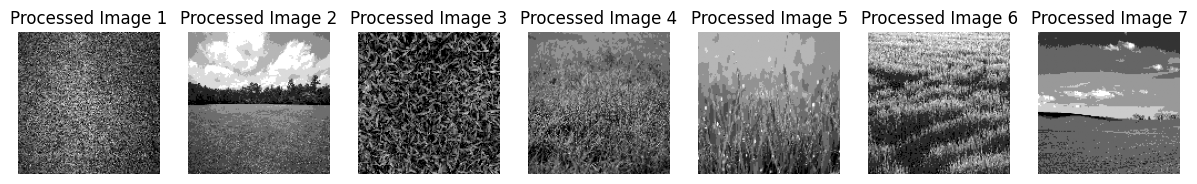

In [14]:
# Display some sample images for verification
num_images_to_display = min(7, len(processed_images))  # Display up to 5 images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

for i in range(num_images_to_display):
    axes[i].imshow(processed_images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Processed Image {i+1}')

plt.show()


## Feature extraction

### First order texture measures (6 features)

- Calculate the below mentioned color features for each image **(1 p)**
    - Mean for each RGB color channel
    - Variance for each RGB color channel

**Explaination:** Here we extract first-order statistical features (mean and variance) from each RGB channel of the given images.

    Parameters:
    images (list or numpy array): List/array of images in RGB format.
    labels (list or numpy array): Corresponding labels for each image.

    Returns:
    numpy array: Feature vectors containing mean and variance values for each image.

In [15]:
# First-order texture measures: Mean and variance of each RGB channel [6]
def extract_first_order_features(images, labels):

    feature_list = []  # List to store feature vectors of images
    data_records = []  # List to store data for creating a DataFrame

    # Iterate through each image and their corresponding labels
    for image, label in zip(images, labels):
        # Compute the mean of each RGB channel (Red, Green, Blue)
        means = np.mean(image, axis=(0, 1))  # Shape: (3,) -> Mean of R, G, B channels

        # Compute the variance of each RGB channel
        variances = np.var(image, axis=(0, 1))  # Shape: (3,) -> Variance of R, G, B channels

        # Combine mean and variance into a single feature vector
        feature_vector = np.concatenate([means, variances])  # Shape: (6,)

        # Append feature vector to the list
        feature_list.append(feature_vector)

        # Append category, mean, and variance values to the data records
        data_records.append([
            image_categories[label],  # Image category name based on label
            means[0], means[1], means[2],  # Mean values of R, G, B channels
            variances[0], variances[1], variances[2]  # Variance values of R, G, B channels
        ])

    # Create a DataFrame to store feature values with category labels
    df_features = pd.DataFrame(data_records, columns=['Category', 'Mean R', 'Mean G', 'Mean B', 'Var R', 'Var G', 'Var B'])

    # Display the first few feature records for each category
    print("\nTable of Color Features:")
    print(df_features.groupby('Category').head(5))

    # Compute and display the mean of the extracted features per category
    summary = df_features.groupby('Category').mean()
    print("\nSummary of Color Features (Mean per Category):")
    print(summary)

    # Return the feature vectors as a NumPy array
    return np.array(feature_list)


In [16]:
# Extracting first-order features
first_order_features = extract_first_order_features(images, labels)
print(f'Extracted first-order features with shape: {first_order_features.shape}')


Table of Color Features:
    Category      Mean R      Mean G      Mean B        Var R        Var G  \
0      grass   64.892395  102.386902   26.584778   986.434283  1151.883449   
1      grass  120.650879  140.342957  124.289368  4175.544374  3313.653438   
2      grass   27.258057   89.403503   16.527710   523.639339  2890.616909   
3      grass  101.384155  117.968994   22.543213  1091.688973  1249.524551   
4      grass  108.419617  152.062134   38.857422  2158.689217  1540.482590   
62      sand  197.796021  168.926086  146.894409   869.213275   904.052337   
63      sand  203.205078  178.962280  141.662964   217.857845   204.289715   
64      sand  209.266174  155.741394  127.180176  1737.811781  2433.825884   
65      sand  178.897461  130.431091   82.820679  1163.247054   965.575208   
66      sand  204.246887  187.063110  175.466614  3564.722677  3340.114059   
123   stairs  163.333618  136.641602  119.501221  3868.786404  4257.701140   
124   stairs  213.365356  213.475281  

### Second order texture measures (4 features)

- Gray-Level-Co-Occurrence (GLCM) features (4 features) **(2 p)**
    - For each image
        - calculate the GLC matrix
        - calculate the "correlation" feature using the GLC matrix that you acquired
            - in horizontal and vertical directions for two reference pixel distances (you can choose the distances)
        - explain your choise for the distances<br>

Gather your features into an input array X, and the image classes into an output array y. Standardize the feature values in X.

In [18]:
# Function to convert images to grayscale and quantize levels [9]
def preprocess_for_texture_analysis(images, levels=8):
    processed_images = []
    for image in images:
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
        quantized_image = (gray_image / (256 // levels)).astype(np.uint8)  # Reduce to 8 levels
        processed_images.append(quantized_image)
    return np.array(processed_images)


In [19]:
# Function to extract GLCM correlation features
def extract_glcm_correlation(images, distances=[1, 2]):
    features = []
    for image in images:
        glcm = graycomatrix(image, distances=distances, angles=[0, np.pi/2], levels=8, symmetric=True, normed=True)

        # Print the GLCM matrix for verification
        print(f"\nGLCM Matrix for Image {i+1} (Shape: {glcm.shape}):\n", glcm[:, :, 0, 0])  # Printing for first distance & angle

        # Extract correlation for horizontal (0 degrees) and vertical (90 degrees) directions
        correlation = [
            graycoprops(glcm, 'correlation')[0, 0],  # Distance 1, Horizontal
            graycoprops(glcm, 'correlation')[0, 1],  # Distance 1, Vertical
            graycoprops(glcm, 'correlation')[1, 0],  # Distance 2, Horizontal
            graycoprops(glcm, 'correlation')[1, 1]   # Distance 2, Vertical
        ]

        features.append(correlation)

    return np.array(features)

In [46]:
# Preprocess images first
processed_images = preprocess_for_texture_analysis(images, levels=8)


In [21]:
# Extract GLCM correlation features
X_glcm = extract_glcm_correlation(processed_images)  # Using preprocessed images
y_glcm = labels  # Ensure 'labels' is your class label array


GLCM Matrix for Image 7 (Shape: (8, 8, 2, 2)):
 [[2.82972441e-03 1.21186024e-02 1.37795276e-02 6.70521654e-03
  1.87623031e-03 3.99852362e-04 3.07578740e-05 0.00000000e+00]
 [1.21186024e-02 8.29847441e-02 9.93786909e-02 4.40760335e-02
  1.20878445e-02 1.47637795e-03 1.23031496e-04 0.00000000e+00]
 [1.37795276e-02 9.93786909e-02 1.56988189e-01 8.85211614e-02
  2.41141732e-02 3.62942913e-03 3.38336614e-04 0.00000000e+00]
 [6.70521654e-03 4.40760335e-02 8.85211614e-02 6.47145669e-02
  2.46985728e-02 4.09079724e-03 1.23031496e-04 0.00000000e+00]
 [1.87623031e-03 1.20878445e-02 2.41141732e-02 2.46985728e-02
  1.16879921e-02 2.58366142e-03 1.23031496e-04 0.00000000e+00]
 [3.99852362e-04 1.47637795e-03 3.62942913e-03 4.09079724e-03
  2.58366142e-03 2.46062992e-04 0.00000000e+00 0.00000000e+00]
 [3.07578740e-05 1.23031496e-04 3.38336614e-04 1.23031496e-04
  1.23031496e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+

In [22]:
# Standardize the extracted features
scaler = StandardScaler()
X_glcm_standardized = scaler.fit_transform(X_glcm)

In [23]:
# Print confirmation of feature extraction
print(f"Extracted GLCM features shape: {X_glcm_standardized.shape}")

Extracted GLCM features shape: (185, 4)


**Gathering features into an input array X, and the image classes into an output array y.**

In [24]:
# Ensure the number of samples match before combining features
if first_order_features.shape[0] != X_glcm_standardized.shape[0]:
    raise ValueError(f"Feature mismatch: First-order features {first_order_features.shape[0]} vs GLCM features {X_glcm_standardized.shape[0]}")

# Combining all features into the input array X
X = np.hstack([first_order_features, X_glcm_standardized])  # Concatenating first-order and second-order features
y = labels  # Target labels

# Standardizing the feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Print final shape
print(f'Final feature array shape: {X.shape}')

Final feature array shape: (185, 10)


## Feature relationships

Make illustrations of the feature relationships, and discuss the results

### Pairplot

- Pairplot **(1 p)**
    - Which feature pairs possess roughly linear dependence?

In [25]:
# Here we ensure that first-order features and GLCM correlation features have the same number of samples
if first_order_features.shape[0] != X_glcm_standardized.shape[0]:
    raise ValueError(f"Feature mismatch: First-order features ({first_order_features.shape[0]}) vs GLCM features ({X_glcm_standardized.shape[0]})")


In [26]:
# Now combining all features into input array X
X = np.hstack([first_order_features, X_glcm_standardized])  # Concatenating first-order and second-order features
y = labels  # Target labels

In [27]:
# Standardizing feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
# Print final shape
print(f'Final feature array shape: {X.shape}')

Final feature array shape: (185, 10)


In [29]:
# Define column names based on extracted features
column_names = [
    'Mean R', 'Mean G', 'Mean B', 'Var R', 'Var G', 'Var B',  # First-order features
    'Correlation H (D1)', 'Correlation V (D1)',  # GLCM Correlation at Distance 1
    'Correlation H (D2)', 'Correlation V (D2)'   # GLCM Correlation at Distance 2
]

In [30]:
# Convert labels to category names
df_features = pd.DataFrame(X, columns=column_names)
df_features['Category'] = [image_categories[i] for i in y]

Generating Pairplot...


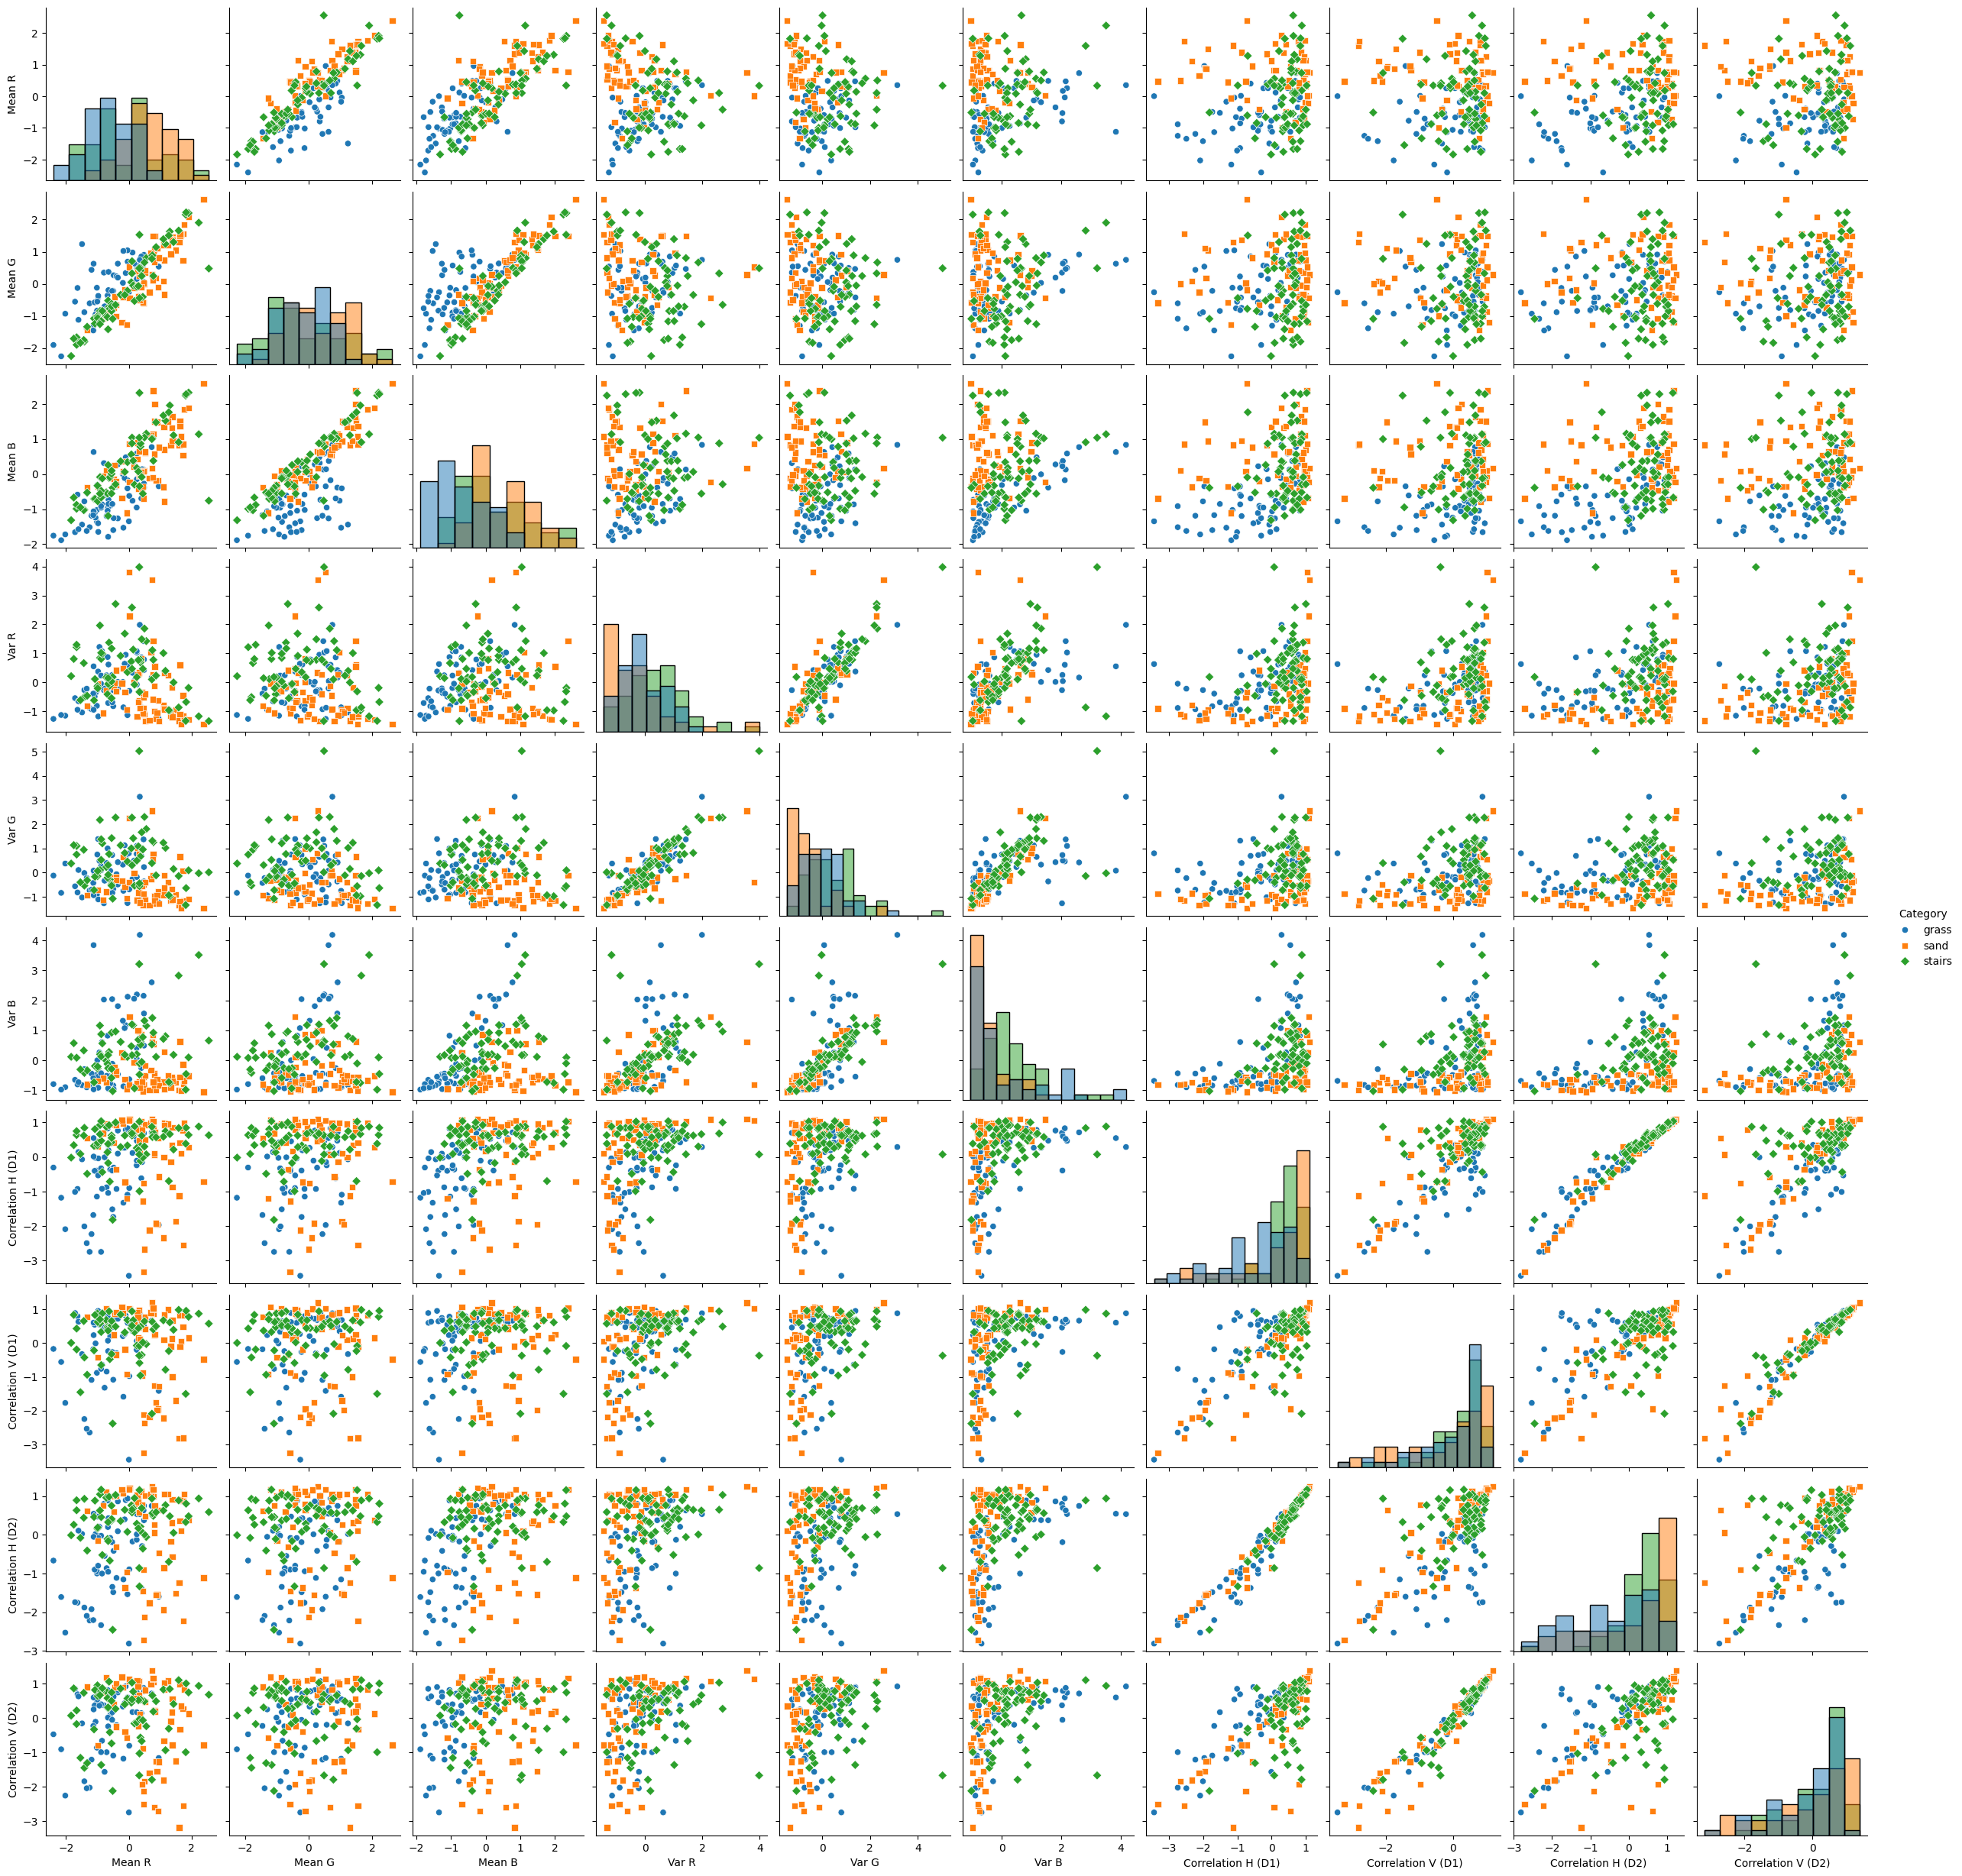

In [31]:
# Feature Relationships: Pairplot [7]
print("Generating Pairplot...")
sns.pairplot(df_features, hue='Category', diag_kind='hist', markers=['o', 's', 'D'])
plt.show()

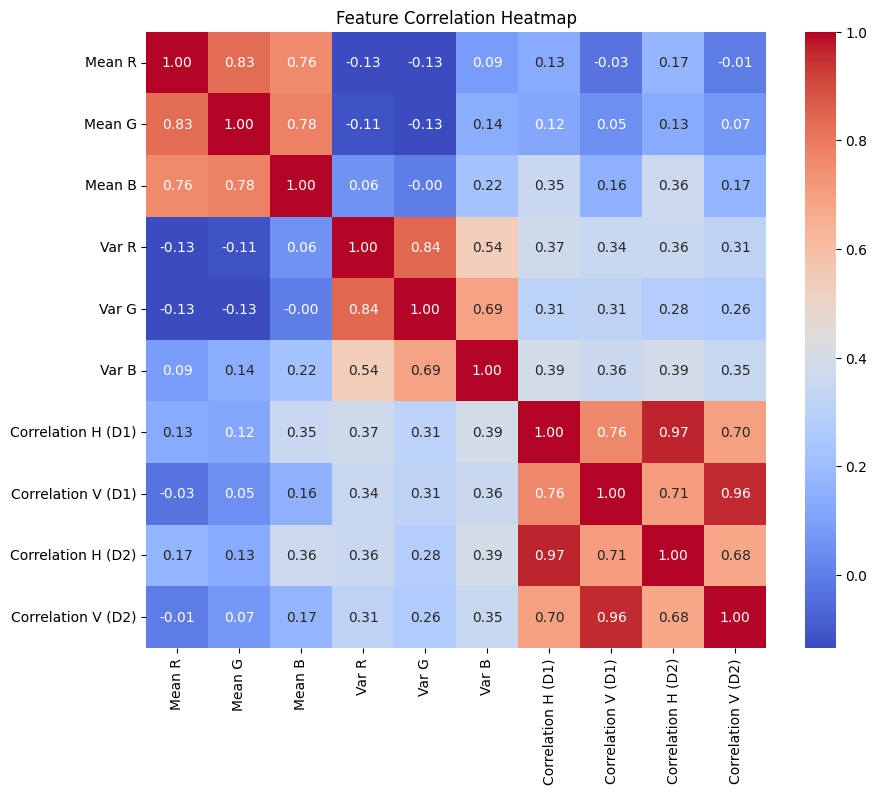

In [32]:
# Just out of curiosity I wanted to see the heat map.
df_numeric = df_features.drop(columns=['Category'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plotting heatmap to visualize linear relationships
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


**Which feature pairs possess roughly linear dependence?**

From analyzing the above pairplot and heat map, several feature pairs exhibit roughly linear dependence, as indicated by their scatter plots forming clear diagonal trends. Notably, there is strong linear relationships observed between the mean values of the RGB channels— **Mean R vs. Mean G, Mean R vs. Mean B, and Mean G vs. Mean B**
which sugests that these color components tend to vary proportionally. Similarly, the variance values of these channels— **Variance R vs. Variance G, Variance R vs. Variance B, and Variance G vs. Variance B** also display a linear dependence, which I think is likely due to the natural correlation between different color intensities in images.

Additionally, the correlation-based features show a structured pattern, reinforcing their interdependence. I think the presence of such relationships suggests that RGB-based statistical features often exhibit strong co-variation, which makes them useful for classification and texture analysis. This linear dependence highlights the potential redundancy in certain features, which could be used for dimensionality reduction techniques such as Principal Component Analysis (PCA) to improve model efficiency.

### Histograms

- Histograms **(1 p)**
    - Plot a histogram for each Z-scored feature. Plot all the image classes in the same figure and use different color for each.
    - Which features may have some discriminative power over image classes according to the histograms? <br>

Generating Histograms...


<Figure size 1500x1200 with 0 Axes>

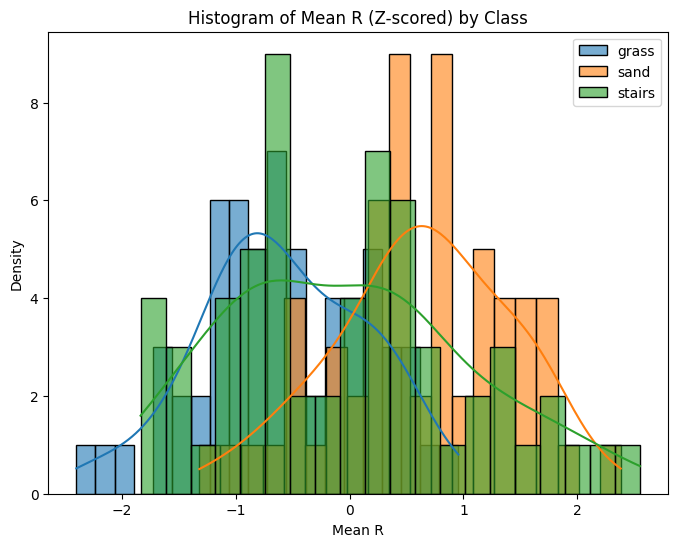

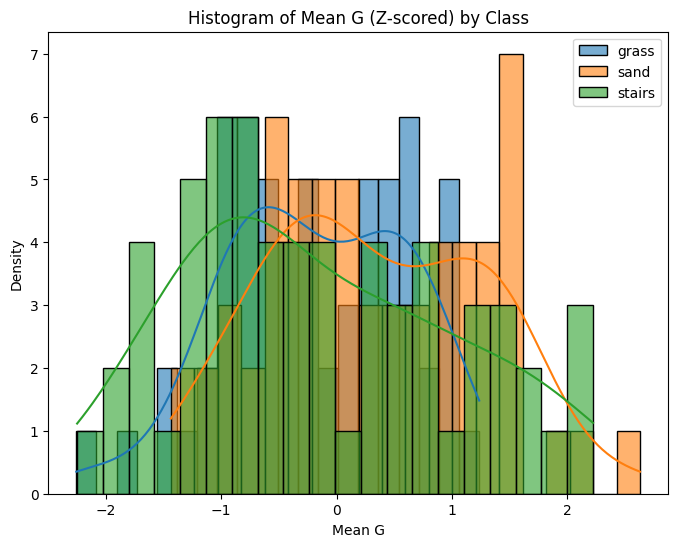

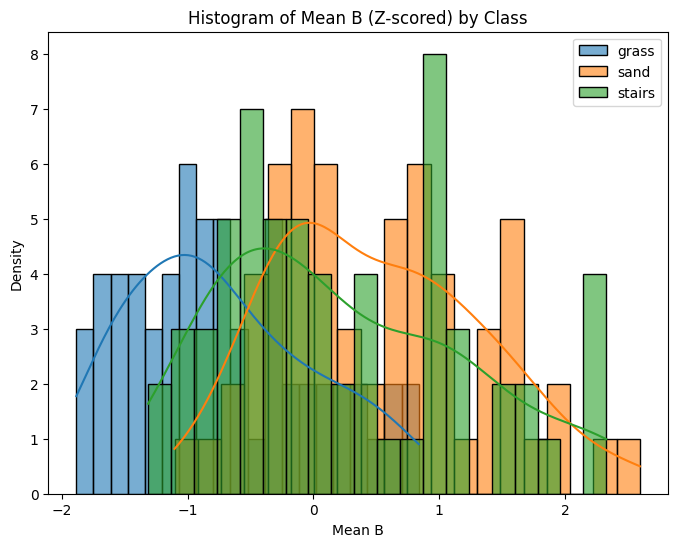

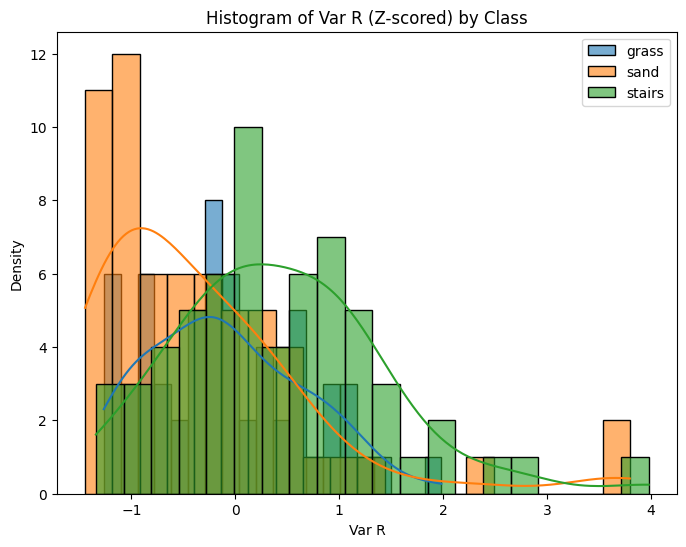

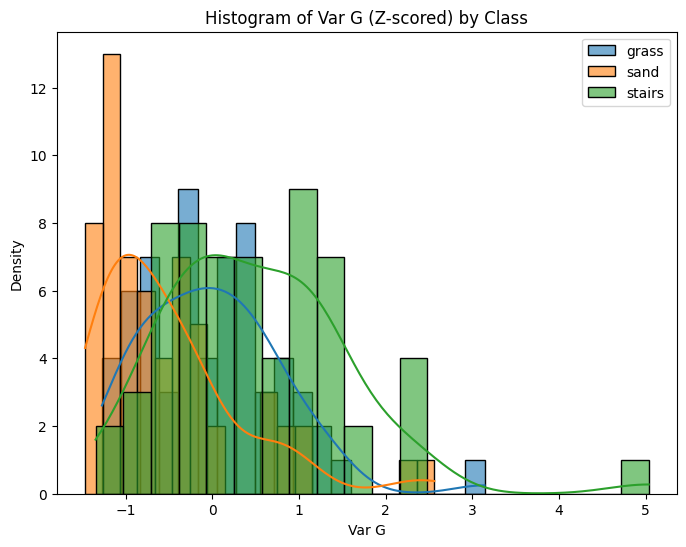

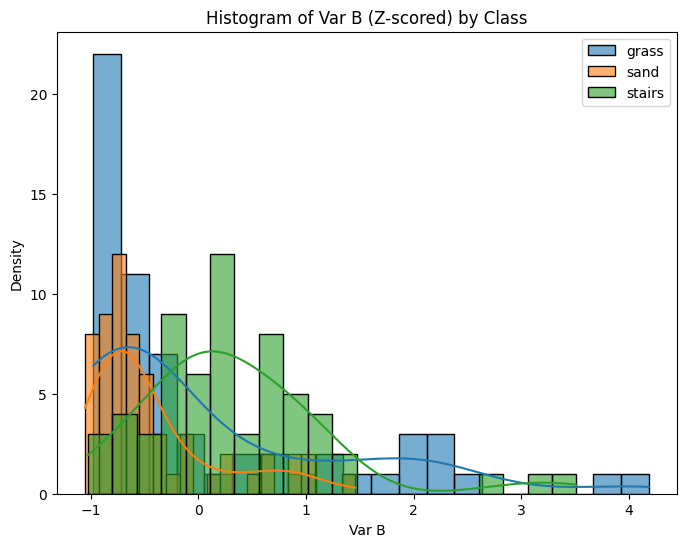

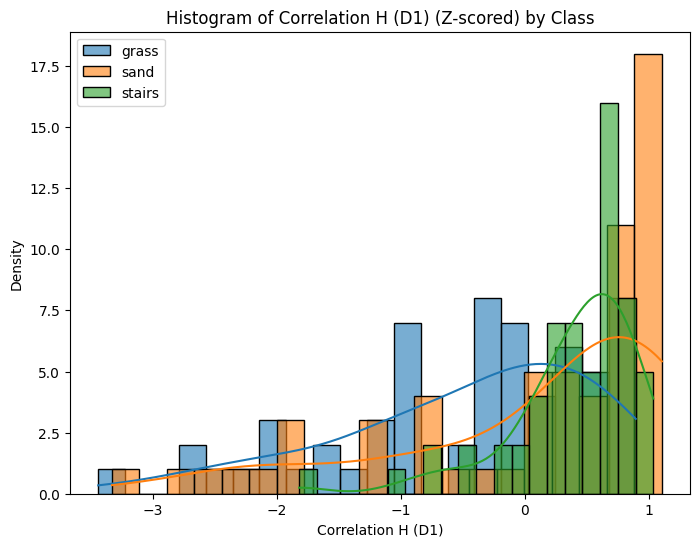

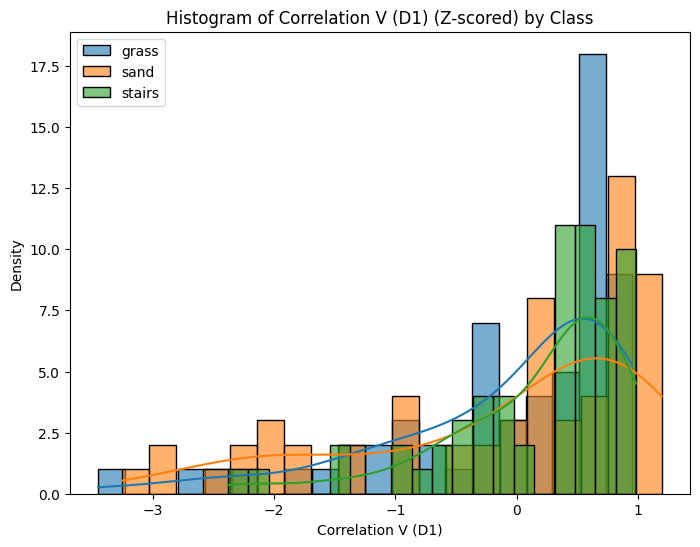

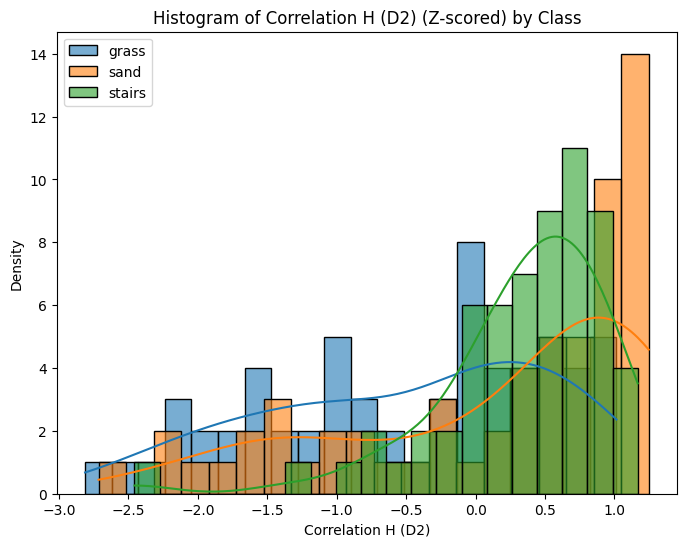

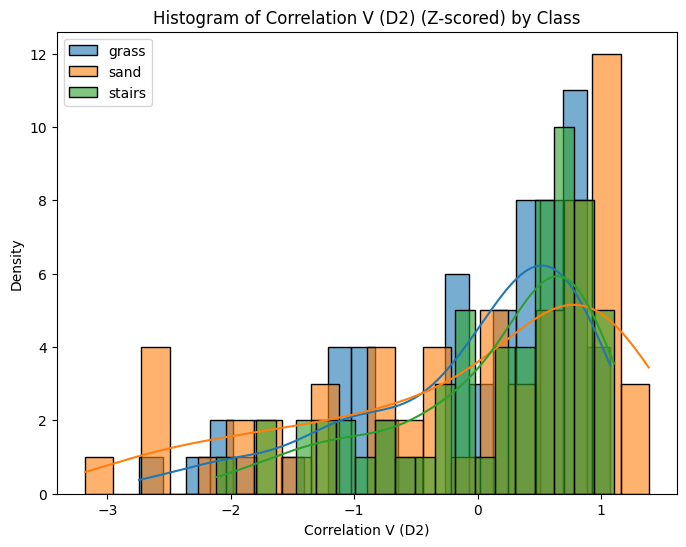

In [33]:
# Feature Relationships: Histograms (Single Figure with All Features)
print("Generating Histograms...")

feature_names = df_features.columns[:-1]  # Exclude 'Category' column

plt.figure(figsize=(15, 12))

for feature in feature_names:
    plt.figure(figsize=(8, 6))  # Separate figure for each feature
    for category in image_categories:
        subset = df_features[df_features['Category'] == category]
        sns.histplot(subset[feature], label=category, kde=True, alpha=0.6, bins=20)

    plt.title(f'Histogram of {feature} (Z-scored) by Class')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


**Which features may have some discriminative power over image classes according to the histograms?**

**Answer:** The histograms of the mean color features (Mean R, Mean G, Mean B) suggests that these features have some discriminative power in distinguishing between the image classes. Mean R shows that sand tends to have higher red intensity compared to grass and stairs, making it a useful feature for classification. Meanwhile, Mean G indicates that grass has a higher green intensity, which aligns with its natural color, while Mean B suggests that stairs and grass have a broader blue distribution than sand. These variations in color intensity can be used to differentiate between these classes effectively [10].

The variance features (Var R, Var G, Var B) also provide some useful insights into texture differences between classes. The variance histograms indicate that sand generally has lower variance, while stairs exhibit a broader range of variance values, which is reflected in the differences in texture between smooth and structured surfaces. Among these, Var B appears particularly useful, as grass tends to have a higher density at lower variance values, distinguishing it from other classes. This suggests that variance in color intensity can contribute significantly to classification tasks.

Lastly, the texture correlation features (Correlation H & V for D1 and D2) show distinct class-based patterns, particularly for sand, which exhibits a strong peak near 1 in Correlation H & V, whereas grass and stairs are more widely distributed. This suggests that correlation features could be useful in capturing structural differences between textures. Overall, features such as Mean R, Mean G, Var B, and Correlation H & V appear to have strong discriminative power, making them valuable for image classification models aimed at distinguishing these surface types.

### PCA

- PCA **(1 p)**
    - Plot the image glasses using different colors.
    - Can you see clusters in PCA?
    - Does this figure give you any clues, how well you will be able to classify the image types? Explain.

Performing PCA Analysis...


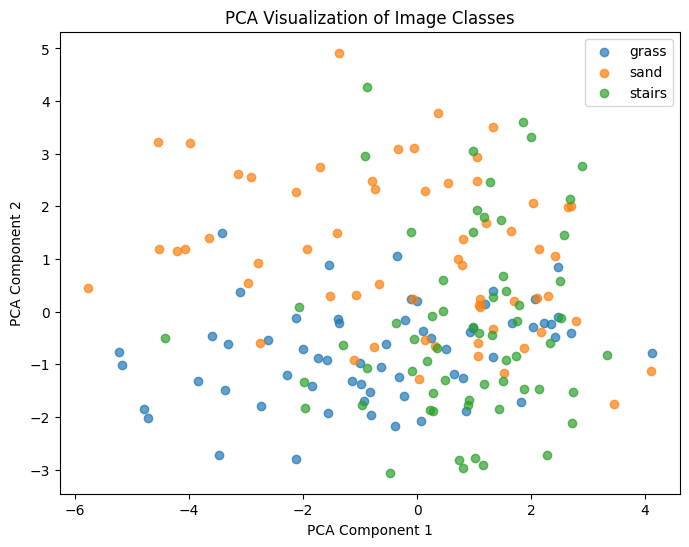

In [34]:
# Apply PCA with 2 components
print("Performing PCA Analysis...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create PCA scatter plot
plt.figure(figsize=(8, 6))
for i, category in enumerate(image_categories):
    subset = X_pca[y == i]  # Extract points for each category
    plt.scatter(subset[:, 0], subset[:, 1], label=category, alpha=0.7)

# Plot settings
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Image Classes')
plt.legend()
plt.show()


**PCA Analysis**

The PCA indicates that Class 0 (Grass) forms a tight cluster on the negative side of Principal Component 1, showing clear separation from the other classes, which suggests it will be easier to classify. In contrast, Class 1 (Sand) has a more dispersed distribution and overlaps significantly with Class 2 (Stairs) in the middle of the PCA space. Class 2 (Stairs) forms a somewhat distinct cluster on the positive side of Principal Component 1, but its overlap with Sand suggests potential classification challenges.

From a classification perspective, Grass (Class 0) is some what separated, meaning models should have comparatively high accuracy in identifying it. However, Sand (Class 1) and Stairs (Class 2) overlap, making misclassification between these two classes more likely. This also suggests that non-linear classifiers might be necessary to improve the separation between these two categories.

## Build classifiers and select the best hyperparameters with cross validation

Perform model selection for each classifier. Use 5-fold stratified cross validation (*StratifiedKFold* and *GridSearchCV* from sklearn). Use the following hyperparameters:

- Ridge Classifier (1 p)
    - strength of the regularization term: alpha = [0.001, 0.01, 0.1, 1.0]

- Random Forest **(1 p)**
    - n_estimators from 100 to 300 with 50 steps
    - max_features = ['sqrt', 'log2', None]
    - whether to use bootstrap or not
    
- MLP **(1 p)**
    - use one hidden layer
    - number of neurons in the hidden layer from 15 to 40 in 5 neuron steps
    - activation function: hyperbolic tanh function and rectified linear unit function
    - solver: stochastic gradient descent and adam
    - validation_fraction: 0.1 and 0.3
    - strength of the L2 regularization term: alpha = [0.01, 0.1, 1]

For each classifier:
- Report the selected combination of hyperparameters <br>
- Report the accuracy value for each hyperparameter combination <br>

For Random Forest model, report the feature importance for each feature. Which features seem to be the most important? Does this correspond with the observations you made in the data exploration? **(1 p)**

In [35]:
# Model Selection using 5-fold Stratified Cross Validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

In [36]:
# Ridge Classifier
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1.0]}
ridge_grid = GridSearchCV(RidgeClassifier(), ridge_params, cv=inner_cv, scoring='accuracy')
ridge_grid.fit(X, y)
print(f'Best Ridge hyperparameters: {ridge_grid.best_params_}')
print(f'Best Ridge accuracy: {ridge_grid.best_score_:.4f}\n')

Best Ridge hyperparameters: {'alpha': 1.0}
Best Ridge accuracy: 0.8053



In [37]:
# Random Forest Classifier
rf_params = {
    'n_estimators': range(100, 301, 50),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=inner_cv, scoring='accuracy')
rf_grid.fit(X, y)
print(f'Best Random Forest hyperparameters: {rf_grid.best_params_}')
print(f'Best Random Forest accuracy: {rf_grid.best_score_:.4f}\n')


Best Random Forest hyperparameters: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 200}
Best Random Forest accuracy: 0.7620



In [38]:
# Feature Importance for Random Forest
best_rf = RandomForestClassifier(**rf_grid.best_params_)
best_rf.fit(X, y)
feature_importances = best_rf.feature_importances_
feature_names = df_features.columns[:-1]

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance from Random Forest:")
print(importance_df)


Feature Importance from Random Forest:
              Feature  Importance
2              Mean B    0.170139
5               Var B    0.152138
0              Mean R    0.124679
8  Correlation H (D2)    0.096276
6  Correlation H (D1)    0.094285
4               Var G    0.093691
1              Mean G    0.089798
3               Var R    0.068742
9  Correlation V (D2)    0.058308
7  Correlation V (D1)    0.051944


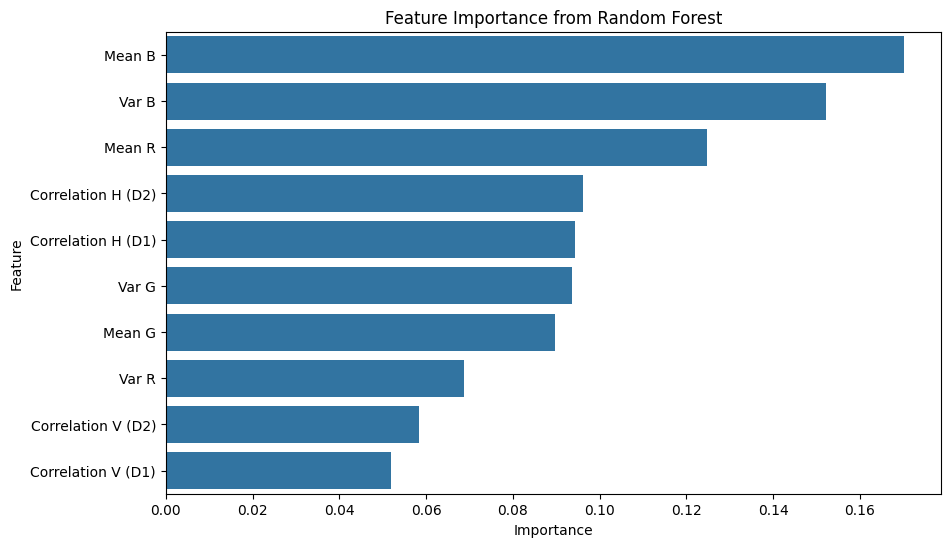

In [39]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [40]:
# MLP Classifier
mlp_params = {
    'hidden_layer_sizes': [(i,) for i in range(15, 41, 5)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'validation_fraction': [0.1, 0.3],
    'alpha': [0.01, 0.1, 1]
}
mlp_grid = GridSearchCV(MLPClassifier(max_iter=10000, early_stopping=True, learning_rate_init=0.005), mlp_params, cv=inner_cv, scoring='accuracy')
mlp_grid.fit(X, y)
print(f'Best MLP hyperparameters: {mlp_grid.best_params_}')
print(f'Best MLP accuracy: {mlp_grid.best_score_:.4f}\n')

Best MLP hyperparameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (40,), 'solver': 'adam', 'validation_fraction': 0.3}
Best MLP accuracy: 0.7033



## **Summary**

**Ridge Classifier [1]**\
Best Ridge hyperparameters: {'alpha': 1.0}\
Best Ridge accuracy: 0.8053

**Random Forest [2]**\
Best Random Forest hyperparameters: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 200}\
Best Random Forest accuracy: 0.7620

Feature Importance from Random Forest

| Rank | Feature               | Importance |
|------|-----------------------|------------|
| 2    | Mean B                | 0.170139   |
| 5    | Var B                 | 0.152138   |
| 0    | Mean R                | 0.124679   |
| 8    | Correlation H (D2)    | 0.096276   |
| 6    | Correlation H (D1)    | 0.094285   |
| 4    | Var G                 | 0.093691   |
| 1    | Mean G                | 0.089798   |
| 3    | Var R                 | 0.068742   |
| 9    | Correlation V (D2)    | 0.058308   |
| 7    | Correlation V (D1)    | 0.051944   |

**MLP [3]**\
Best MLP hyperparameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (40,), 'solver': 'adam', 'validation_fraction': 0.3}\
Best MLP accuracy: 0.7033

## Estimate the performance of the models with nested cross-validation

Estimate the performance of each model using nested cross validation. <br>
We'll use 4-fold Stratified Kfold cross-validation and the same parameter ranges as earlier for the inner loop. <br>
For the outer loop we'll use 5-fold Stratified Kfold cross-validation.

For each classifier:
- Ridge Classifier **(1 p)**
- Random Forest **(1 p)**
- MLP **(1 p)**

    Report the selected combination of the hyperparameters and the accuracy value for the best hyperparameter combination. <br>
    Create a confusion matrix of the results. <br>
    Calculate the mean accuracy of the outer rounds. What does it mean? **(1 p)**

In [41]:
# Ridge Classifier with Nested Cross Validation
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1.0]}
ridge_model = RidgeClassifier()
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=inner_cv, scoring='accuracy')
ridge_scores = cross_val_score(ridge_grid, X, y, cv=outer_cv, scoring='accuracy')
print(f'Ridge Nested CV Accuracy: {np.mean(ridge_scores):.4f} ± {np.std(ridge_scores):.4f}')

Ridge Nested CV Accuracy: 0.7838 ± 0.0616


In [42]:
# Random Forest Classifier with Nested Cross Validation
rf_params = {
    'n_estimators': range(100, 301, 50),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}
rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(rf_model, rf_params, cv=inner_cv, scoring='accuracy')
rf_scores = cross_val_score(rf_grid, X, y, cv=outer_cv, scoring='accuracy')
print(f'Random Forest Nested CV Accuracy: {np.mean(rf_scores):.4f} ± {np.std(rf_scores):.4f}')

Random Forest Nested CV Accuracy: 0.7568 ± 0.0513


In [43]:
# MLP Classifier with Nested Cross Validation [5]
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'validation_fraction': [0.1, 0.3],
    'alpha': [0.01, 0.1, 1]
}

mlp_model = MLPClassifier(max_iter=5000, early_stopping=True, learning_rate_init=0.009)

mlp_grid = GridSearchCV(mlp_model, mlp_params, cv=inner_cv, scoring='accuracy')
mlp_scores = cross_val_score(mlp_grid, X, y, cv=outer_cv, scoring='accuracy')
print(f'MLP Nested CV Accuracy: {np.mean(mlp_scores):.4f} ± {np.std(mlp_scores):.4f}')


MLP Nested CV Accuracy: 0.7405 ± 0.0501


In [44]:
print(f'Ridge Nested CV Accuracy: {np.mean(ridge_scores):.4f} ± {np.std(ridge_scores):.4f}')
print(f'Random Forest Nested CV Accuracy: {np.mean(rf_scores):.4f} ± {np.std(rf_scores):.4f}')
print(f'MLP Nested CV Accuracy: {np.mean(mlp_scores):.4f} ± {np.std(mlp_scores):.4f}')

Ridge Nested CV Accuracy: 0.7838 ± 0.0616
Random Forest Nested CV Accuracy: 0.7568 ± 0.0513
MLP Nested CV Accuracy: 0.7405 ± 0.0501


Confusion Matrix for Ridge:
[[53  4  5]
 [ 0 49 12]
 [ 3 16 43]]


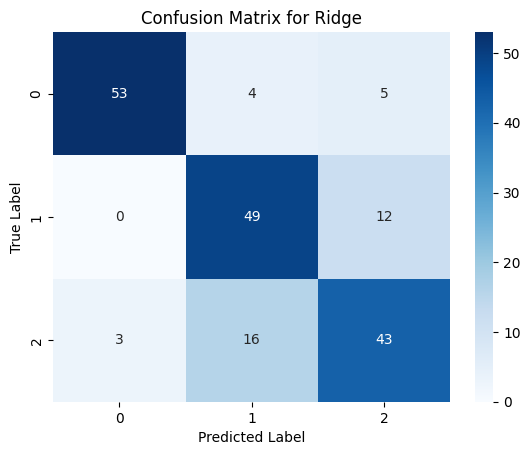

Confusion Matrix for RandomForest:
[[46  4 12]
 [ 3 48 10]
 [ 4 12 46]]


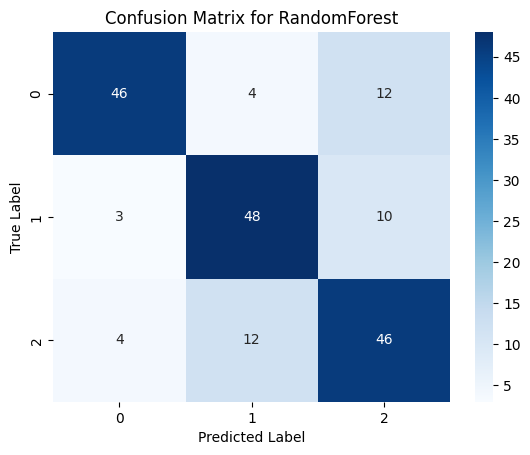

Confusion Matrix for MLP:
[[53  4  5]
 [ 1 51  9]
 [ 7  8 47]]


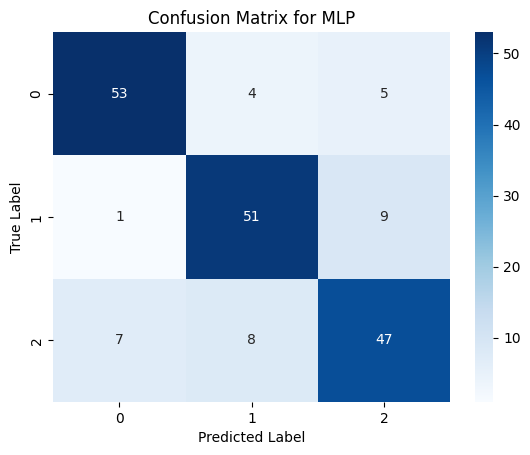

In [45]:
# Compute and Display Confusion Matrices for Best Models using cross-validation predictions
for model_name, best_model in [('Ridge', ridge_grid), ('RandomForest', rf_grid), ('MLP', mlp_grid)]:
    best_model.fit(X, y)
    y_pred_nested = cross_val_predict(best_model.best_estimator_, X, y, cv=outer_cv)
    cm = confusion_matrix(y, y_pred_nested)
    print(f'Confusion Matrix for {model_name}:\n{cm}')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## Discussion

- Discuss you results **(2 p)**
<br>E.g.
    - Which model performs the best and why?
    - What are the limitations?
    - How could the results be improved?

## **Discussion of Results**

The Ridge Regression model achieved the highest Nested Cross-Validation (CV) accuracy of (0.7838 ± 0.0616), followed by Random Forest (0.7568 ± 0.0513) and MLP (0.7405 ± 0.0501). The confusion matrices [4] reveal that Ridge classifier performed well in maintaining balanced classification across all classes, while Random Forest and MLP showed higher misclassifications in certain categories. The Ridge model's performance suggests that the image features are linearly separable to some extent, allowing a linear regression-based classifier to generalize well. Additionally, Ridge’s regularization helps in controlling overfitting, leading to a more stable model. While MLP which is a neural network is generally capable of capturing complex patterns, its lower accuracy and slightly higher standard deviation suggest either insufficient training data, or difficulty in learning from the current feature set.

Even despite Ridge Regression's superior performance, all models exhibit some limitations, particularly in distinguishing certain classes. The confusion matrices indicate misclassification trends, such as Class 2 (stairs) being confused with Class 1 (sand) in all models, which suggests that some image textures may have overlapping characteristics. Random Forest's performance was slightly lower, likely due to its tendency to overfit small datasets or struggle with correlated features. MLP’s lower accuracy and higher variance indicate that a more complex neural network architecture or additional training data may be necessary. To improve the results, one could explore incorporating additional texture descriptors such as Gabor filters or Local Binary Patterns, or maybe dimensionality reduction, and hyperparameter tuning specifically for Random Forest and MLP. Additionally, I think ensemble methods combining Ridge with Random Forest or MLP could enhance overall robustness and classification performance.

## **Conclusion**

Ridge regression, while performing well, struggles with non-linear relationships and feature interactions, which limits its ability to capture complex patterns. Random Forest, though effective, can be difficult to interpret due to its black-box nature and is prone to overfitting on small datasets. The MLP classifier, being a neural network, requires significant computational resources and extensive hyperparameter tuning, making it challenging to optimize. Additionally, MLP’s sensitivity to parameter settings can lead to inconsistent performance if not properly tuned.

**Ways to Improve Results**\
I think enhancing the models' performance can be achieved through data augmentation, that is generating more diverse training samples to improve generalization. Advanced models like Convolutional Neural Networks (CNNs) could be more suitable for image classification as they inherently capture spatial relationships. Also, Feature engineering such as adding advanced texture descriptors, could also improve feature separability. Apart form these we can also use ensemble methods (e.g., stacking or boosting) which could leverage the strengths of multiple models for better classification. More efficient hyperparameter tuning techniques, like Bayesian Optimization, could further refine model performance, particularly benefiting the MLP classifier.

**References**

1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html\

2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

3. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

4. https://www.v7labs.com/blog/confusion-matrix-guide

5. https://www.geeksforgeeks.org/hyperparameter-tuning/

6. https://ujangriswanto08.medium.com/enhancing-image-recognition-systems-with-advanced-feature-selection-techniques-d88a6ea666e5

7. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

8. https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

9. https://medium.com/aimonks/gray-level-co-occurrence-matrix-glcm-a-comprehensive-analysis-a58bbc49c0f6

10. https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1